<a href="https://colab.research.google.com/github/karmanandan/my_colab/blob/master/ML_with_NP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Machine Learning with Numpy

In [ ]:
import numpy as np

In [ ]:
class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

    def score(self,X,y):
      actual = y
      predict = self.predict(X)
      score_list = []
      for i in range(len(y)):
        score_list.append(np.sqrt((actual[i]-predict[i])**2))
      return  sum(score_list)

In [ ]:
lr = LinearRegression()

In [ ]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

In [ ]:
lr.fit(X,y)

In [ ]:
lr.predict(X)

array([ 5.20879105,  7.5068133 ,  9.20205384, 11.50007609])

In [ ]:
y

array([ 6,  8,  9, 11])

In [ ]:
lr.score(X,y)

1.9865255831903106

In [ ]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples=150, n_features=1, noise=2, random_state=0)

In [ ]:
X_train = X[:100,]
y_train = y[:100,]

In [ ]:
X_test = X[100:,]
y_test = y[100:,]

In [ ]:
lr = LinearRegression(n_iters=100000)
lr.fit(X_train, y_train)

In [ ]:
preds = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

78.27646502379571

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Epoch 10, Loss 2299.0312
Epoch 20, Loss 2225.4741
Epoch 30, Loss 2154.8630
Epoch 40, Loss 2087.0806
Epoch 50, Loss 2022.0129
Epoch 60, Loss 1959.5504
Epoch 70, Loss 1899.5891
Epoch 80, Loss 1842.0280
Epoch 90, Loss 1786.7708
Epoch 100, Loss 1733.7251
Epoch 110, Loss 1682.8024
Epoch 120, Loss 1633.9169
Epoch 130, Loss 1586.9873
Epoch 140, Loss 1541.9347
Epoch 150, Loss 1498.6841
Epoch 160, Loss 1457.1626
Epoch 170, Loss 1417.3014
Epoch 180, Loss 1379.0339
Epoch 190, Loss 1342.2959
Epoch 200, Loss 1307.0264
Epoch 210, Loss 1273.1660
Epoch 220, Loss 1240.6586
Epoch 230, Loss 1209.4498
Epoch 240, Loss 1179.4878
Epoch 250, Loss 1150.7223
Epoch 260, Loss 1123.1056
Epoch 270, Loss 1096.5914
Epoch 280, Loss 1071.1359
Epoch 290, Loss 1046.6964
Epoch 300, Loss 1023.2322
Epoch 310, Loss 1000.7045
Epoch 320, Loss 979.0754
Epoch 330, Loss 958.3093
Epoch 340, Loss 938.3717
Epoch 350, Loss 919.2291
Epoch 360, Loss 900.8499
Epoch 370, Loss 883.2034
Epoch 380, Loss 866.2606
Epoch 390, Loss 849.9931
Epo

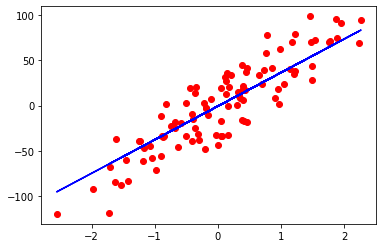

In [ ]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20,
                                            random_state=0)
X = torch.from_numpy(X_numpy.astype('float32'))
y = torch.from_numpy(y_numpy.astype('float32'))

y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

learning_rate = 0.001
loss_criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 1000

for i in range(num_epochs):
  y_predicted = model(X)
  loss = loss_criterion(y_predicted,y)

  loss.backward()
  optimizer.step()

  optimizer.zero_grad()

  if (i+1)%10==0:
    print(f'Epoch {i+1}, Loss {loss.item():.4f}')

predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()



In [ ]:
class LogisticRegression:

  def __init__(self, learning_rate=0.001, num_iters=1000):
    self.lr = learning_rate
    self.n_iter = num_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iter):
      linear_model = np.dot(X, self.weights) + self.bias
      predicted = self._sigmoid(linear_model)

      dw = (1/n_samples)*np.dot(X.T,(predicted-y))
      db = (1/n_samples)*np.sum(predicted-y)

      self.weights -= self.lr*dw
      self.bias -= self.lr*db

  def predict(self, X):
      linear_model = np.dot(X, self.weights) + self.bias
      predicted = self._sigmoid(linear_model)

      predicted_cls = [1 if i > 0.5 else 0 for i in predicted]

      return np.array(predicted_cls)

  def score(self, X,y):
    actual = y
    predict = self.predict(X)
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for i in range(len(actual)):
      if actual[i] ==1 and predict[i] ==1:
        true_positives +=1
      if actual[i] ==0 and predict[i] ==1:
        false_positives +=1
      if actual[i] ==0 and predict[i] ==0:
        true_negatives +=1
      if actual[i] ==1 and predict[i] ==0:
        false_negatives +=1


    print(f'True positives {true_positives}')
    print(f'False positives {false_positives}')
    print(f'True Negatives {true_negatives}')
    print(f'False Negatives {false_negatives}')

    all = true_positives+false_positives+true_negatives+false_negatives

    accuracy = (true_positives+true_negatives)/all

    error = (false_positives+false_negatives)/all

    print(f'Accuracy {accuracy}')

    print(f'Error Rate {error}')


  def _sigmoid(self,x):
    return 1/(1+np.exp(-x))

In [ ]:
# from sklearn.datasets import load_iris
# X, y = load_iris(return_X_y=True)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=150, n_features=5, n_classes=2) 

In [ ]:
X_train = X[:100,]
y_train = y[:100,]

In [ ]:
X_test = X[100:,]
y_test = y[100:,]

In [ ]:
log_r = LogisticRegression()

In [ ]:
log_r.fit(X_train,y_train)

In [ ]:
log_r.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1])

In [ ]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1])

In [ ]:
log_r.score(X_test, y_test)

True positives 23
False positives 0
True Negatives 25
False Negatives 2
Accuracy 0.96
Error Rate 0.04
